In [94]:
import vegas
import numpy as np

## One-dimensional Gaussian integral

First using uniform sampling.

In [107]:
import scipy.stats

def f(x):
   return scipy.stats.norm.pdf(x, 0, 0.0001)

m = vegas.AdaptiveMap([[-10, 10]], ninc=5)

ny = 1000
y = np.random.uniform(0., 1., (ny,1))  # 1000 random y's

x = np.empty(y.shape, float)            # work space
jac = np.empty(y.shape[0], float)
f2 = np.empty(y.shape[0], float)

print('intial grid:')
print(m.settings())

for itn in range(5):                    # 5 iterations to adapt
   m.map(y, x, jac)                     # compute x's and jac

   for j in range(ny):                  # compute training data
      f2[j] = (jac[j] * f(x[j])) ** 2

   m.add_training_data(y, f2)           # adapt
   m.adapt(alpha=1.5)

   print('iteration %d:' % itn)
   print(m.settings())

integ = vegas.Integrator(m)

result = integ(f, nitn=10, neval=1000)
print(result.summary())

intial grid:
    grid[ 0] = [-10.  -6.  -2.   2.   6.  10.]

iteration 0:
    grid[ 0] = [-10.  -6.  -2.   2.   6.  10.]

iteration 1:
    grid[ 0] = [-10.  -6.  -2.   2.   6.  10.]

iteration 2:
    grid[ 0] = [-10.  -6.  -2.   2.   6.  10.]

iteration 3:
    grid[ 0] = [-10.  -6.  -2.   2.   6.  10.]

iteration 4:
    grid[ 0] = [-10.  -6.  -2.   2.   6.  10.]

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0(0)            0(0)                0.00     1.00
  2   0(0)            0(0)                0.00     1.00
  3   0(0)            0(0)                0.00     1.00
  4   0(0)            0(0)                0.00     1.00
  5   0(0)            0(0)                0.00     1.00
  6   0(0)            0(0)                0.00     1.00
  7   0(0)            0(0)                0.00     1.00
  8   0(0)            0(0)                0.00     1.00
  9   0(0)            0(0)                0.00     1.00
 10   0(0)        

Trying the same but with Gaussian samples.

In [112]:
m = vegas.AdaptiveMap([[-10, 10]], ninc=5)

ny = 1000
z = np.random.normal(0, 0.0001, (ny,1))
y = np.array([(a + 10) / 20 for a in z])

x = np.zeros(y.shape, float)            # work space
jac = np.empty(y.shape[0], float)
f2 = np.empty(y.shape[0], float)

print('intial grid:')
print(m.settings())

for itn in range(5):                    # 5 iterations to adapt
   m.map(y, x, jac)                     # compute x's and jac

   for j in range(ny):                  # compute training data
      f2[j] = (jac[j] * f(x[j])) ** 2

   m.add_training_data(y, f2)           # adapt
   m.adapt(alpha=1.5)

   print('iteration %d:' % itn)
   print(m.settings())

integ = vegas.Integrator(m)

result = integ(f, nitn=10, neval=1000)
print(result.summary())

intial grid:
    grid[ 0] = [-10.  -6.  -2.   2.   6.  10.]

iteration 0:
    grid[ 0] = [-10.     -2.026  -0.67    0.67    2.026  10.   ]

iteration 1:
    grid[ 0] = [-10.     -0.679  -0.224   0.224   0.679  10.   ]

iteration 2:
    grid[ 0] = [-10.     -0.227  -0.075   0.075   0.227  10.   ]

iteration 3:
    grid[ 0] = [-10.     -0.076  -0.025   0.025   0.076  10.   ]

iteration 4:
    grid[ 0] = [-1.000e+01 -2.547e-02 -8.414e-03  8.414e-03  2.547e-02
                 1.000e+01]

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.63(60)        0.63(60)            0.00     1.00
  2   0.9853(74)      0.9853(74)          0.35     0.55
  3   0.99997(85)     0.99978(84)         2.13     0.12
  4   1.00052(37)     1.00039(34)         1.63     0.18
  5   1.00045(33)     1.00042(24)         1.23     0.30
  6   0.99978(36)     1.00023(20)         1.42     0.21
  7   0.99930(35)     1.00000(17)         2.09     0.05
  8   

## Bimodal Gaussian

First using uniform samples.

In [115]:
def f(x):
   return 0.5 * (scipy.stats.norm.pdf(x[0], 0, 1) * scipy.stats.norm.pdf(x[1], 0, 1) +
                 scipy.stats.norm.pdf(x[0], 5, 0.05) * scipy.stats.norm.pdf(x[1], 5, 0.05))

m = vegas.AdaptiveMap([[-10, 20],[-10, 20]], ninc=5)

ny = 1000
y = np.random.uniform(0., 1., (ny,2))  # 1000 random y's

x = np.empty(y.shape, float)            # work space
jac = np.empty(y.shape[0], float)
f2 = np.empty(y.shape[0], float)

print('intial grid:')
print(m.settings())

for itn in range(5):                    # 5 iterations to adapt
   m.map(y, x, jac)                     # compute x's and jac

   for j in range(ny):                  # compute training data
      f2[j] = (jac[j] * f(x[j])) ** 2

   m.add_training_data(y, f2)           # adapt
   m.adapt(alpha=1.5)

   print('iteration %d:' % itn)
   print(m.settings())

integ = vegas.Integrator(m)

result = integ(f, nitn=10, neval=1000)
print(result.summary())

intial grid:
    grid[ 0] = [-10.  -4.   2.   8.  14.  20.]
    grid[ 1] = [-10.  -4.   2.   8.  14.  20.]

iteration 0:
    grid[ 0] = [-10.     -5.406  -2.41   -0.118   2.498  20.   ]
    grid[ 1] = [-10.     -5.438  -2.442  -0.166   2.316  20.   ]

iteration 1:
    grid[ 0] = [-10.     -2.02   -0.659   0.788   2.292  20.   ]
    grid[ 1] = [-10.     -1.959  -0.478   0.895   2.239  20.   ]

iteration 2:
    grid[ 0] = [-10.     -1.322  -0.298   0.419   1.512  20.   ]
    grid[ 1] = [-10.     -1.454  -0.325   0.395   1.355  20.   ]

iteration 3:
    grid[ 0] = [-1.000e+01 -9.740e-01 -4.996e-03  7.434e-01  2.266e+00
                 2.000e+01]
    grid[ 1] = [-10.     -1.198  -0.242   0.388   2.189  20.   ]

iteration 4:
    grid[ 0] = [-10.     -2.197  -0.326   0.395   1.529  20.   ]
    grid[ 1] = [-10.     -1.239  -0.361   0.272   1.64   20.   ]

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.519(23)       0.51

Method to sample from each mode.

In [116]:
def sampler():
    if np.random.rand() > 0.5:
        return np.random.normal(0, 1, (2, 1))
    else:
        return np.random.normal(5, 0.05, (2, 1))

Use independent samples.

In [117]:
m = vegas.AdaptiveMap([[-10, 20],[-10, 20]], ninc=5)

ny = 1000
z = [sampler() for i in range(ny)]

# transform to be in unit cube
y = np.squeeze(np.array([(a + 10) / 30 for a in z]))

x = np.empty(y.shape, float)            # work space
jac = np.empty(y.shape[0], float)
f2 = np.empty(y.shape[0], float)

print('intial grid:')
print(m.settings())

for itn in range(5):                    # 5 iterations to adapt
   m.map(y, x, jac)                     # compute x's and jac

   for j in range(ny):                  # compute training data
      f2[j] = (jac[j] * f(x[j])) ** 2

   m.add_training_data(y, f2)           # adapt
   m.adapt(alpha=1.5)

   print('iteration %d:' % itn)
   print(m.settings())

integ = vegas.Integrator(m)

result = integ(f, nitn=10, neval=1000)
print(result.summary())

intial grid:
    grid[ 0] = [-10.  -4.   2.   8.  14.  20.]
    grid[ 1] = [-10.  -4.   2.   8.  14.  20.]

iteration 0:
    grid[ 0] = [-10.      1.601   3.905   5.944   7.983  20.   ]
    grid[ 1] = [-10.      1.601   3.905   5.944   7.983  20.   ]

iteration 1:
    grid[ 0] = [-10.      3.833   4.57    5.257   5.945  20.   ]
    grid[ 1] = [-10.      3.833   4.57    5.257   5.945  20.   ]

iteration 2:
    grid[ 0] = [-10.      4.558   4.797   5.028   5.26   20.   ]
    grid[ 1] = [-10.      4.558   4.797   5.028   5.26   20.   ]

iteration 3:
    grid[ 0] = [-10.      4.792   4.873   4.95    5.028  20.   ]
    grid[ 1] = [-10.      4.792   4.873   4.95    5.028  20.   ]

iteration 4:
    grid[ 0] = [-10.      4.867   4.897   4.924   4.95   20.   ]
    grid[ 1] = [-10.      4.867   4.897   4.924   4.95   20.   ]

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.60(36)        0.60(36)            0.00     1.00
  2 

Plot samples to check they look sensible.

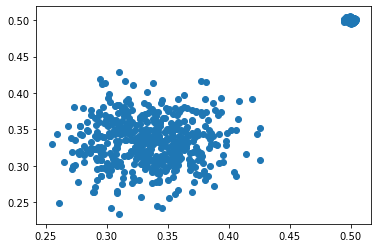

In [118]:
import matplotlib.pyplot as plt
plt.scatter(y[:, 0], y[:, 1])
plt.show()